# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# 1. Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
# 2. Memuat Dataset dari Hasil Clustering
# Load dataset
file_path = '/content/drive/MyDrive/Dicoding Dataset/clasifikasi_income_survey.csv'
df = pd.read_csv(file_path)

In [4]:
# Menampilkan informasi dataset
print("Informasi Dataset:")
print(df.info())
print("\n5 Data Pertama:")
print(df.head())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72643 entries, 0 to 72642
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weight             72643 non-null  float64
 1   Province           72643 non-null  int64  
 2   Age_gap            72643 non-null  float64
 3   Gender             72643 non-null  int64  
 4   Marital_status     72643 non-null  int64  
 5   Highschool         72643 non-null  int64  
 6   Highest_edu        72643 non-null  int64  
 7   Work_yearly        72643 non-null  int64  
 8   Emp_week_ref       72643 non-null  int64  
 9   Total_hour_ref     72643 non-null  int64  
 10  paid_emp_ref       72643 non-null  int64  
 11  self_emp_ref       72643 non-null  int64  
 12  Immigrant          72643 non-null  int64  
 13  Year_immigrant     72643 non-null  int64  
 14  income_after_tax   72643 non-null  int64  
 15  Cap_gain           72643 non-null  int64  
 16  Chi

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
# 3. Data Splitting
# Memisahkan fitur dan target
# Kita akan memprediksi 'Cluster' sebagai target
X = df.drop(['Cluster'], axis=1)
y = df['Cluster']

# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nDimensi Data:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Dimensi Data:
X_train: (58114, 47), X_test: (14529, 47)
y_train: (58114,), y_test: (14529,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [6]:
# a. Membangun Model Klasifikasi

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


Logistic Regression Performance:
Accuracy: 1.0000
F1-Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11950
           1       1.00      1.00      1.00      2579

    accuracy                           1.00     14529
   macro avg       1.00      1.00      1.00     14529
weighted avg       1.00      1.00      1.00     14529



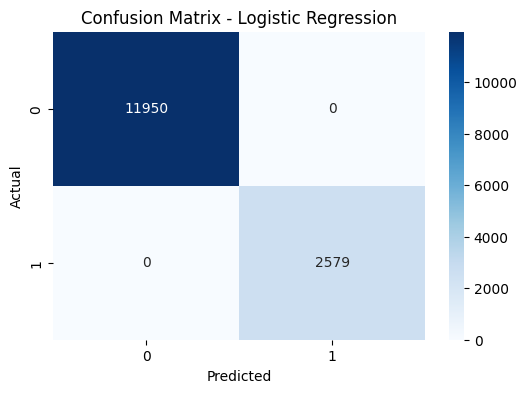


Decision Tree Performance:
Accuracy: 1.0000
F1-Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11950
           1       1.00      1.00      1.00      2579

    accuracy                           1.00     14529
   macro avg       1.00      1.00      1.00     14529
weighted avg       1.00      1.00      1.00     14529



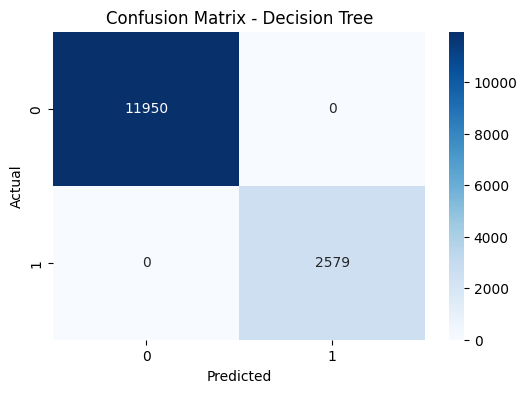


Random Forest Performance:
Accuracy: 1.0000
F1-Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11950
           1       1.00      1.00      1.00      2579

    accuracy                           1.00     14529
   macro avg       1.00      1.00      1.00     14529
weighted avg       1.00      1.00      1.00     14529



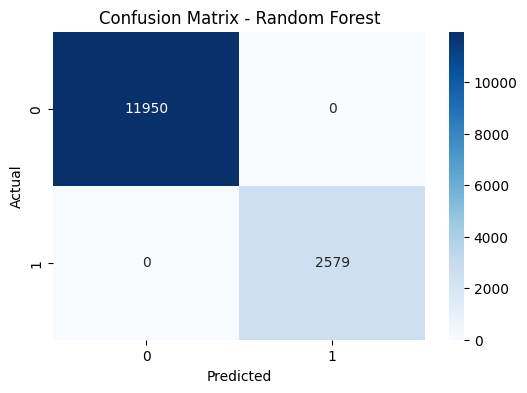


KNN Performance:
Accuracy: 1.0000
F1-Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11950
           1       1.00      1.00      1.00      2579

    accuracy                           1.00     14529
   macro avg       1.00      1.00      1.00     14529
weighted avg       1.00      1.00      1.00     14529



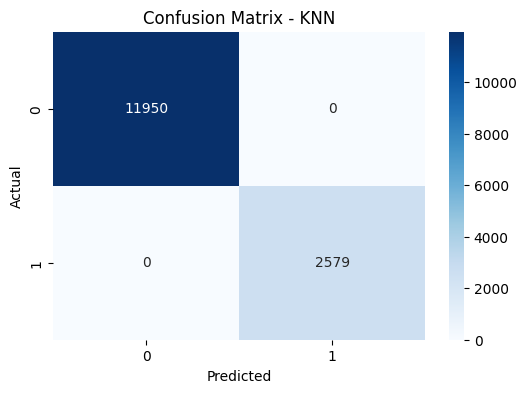

In [7]:
# b. Evaluasi Model Klasifikasi
models = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'KNN': knn
}

results = {}

for name, model in models.items():
    # Prediksi
    y_pred = model.predict(X_test_scaled)

    # Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': cm
    }

    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [8]:
# c. Tuning Model Klasifikasi (Optional)
# Kita akan tuning Random Forest sebagai contoh
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                      param_grid,
                      cv=5,
                      scoring='accuracy',
                      n_jobs=-1,
                      verbose=1)

rf_grid.fit(X_train_scaled, y_train)

print("\nBest Parameters for Random Forest:")
print(rf_grid.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [10]:
# d. Evaluasi Model Klasifikasi setelah Tuning
best_rf = rf_grid.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test_scaled)

accuracy_tuned = accuracy_score(y_test, y_pred_rf_tuned)
f1_tuned = f1_score(y_test, y_pred_rf_tuned, average='weighted')

print("\nRandom Forest Performance After Tuning:")
print(f"Accuracy: {accuracy_tuned:.4f} (Before: {results['Random Forest']['accuracy']:.4f})")
print(f"F1-Score: {f1_tuned:.4f} (Before: {results['Random Forest']['f1_score']:.4f})")



Random Forest Performance After Tuning:
Accuracy: 1.0000 (Before: 1.0000)
F1-Score: 1.0000 (Before: 1.0000)


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

In [11]:
# e. Analisis Hasil Evaluasi Model Klasifikasi
print("\nAnalisis Hasil Evaluasi:")
print("1. Perbandingan Performa Model:")
for name, result in results.items():
    print(f"{name}: Accuracy = {result['accuracy']:.4f}, F1-Score = {result['f1_score']:.4f}")

print("\n2. Hasil Tuning Random Forest:")
print(f"Peningkatan accuracy: {accuracy_tuned - results['Random Forest']['accuracy']:.4f}")
print(f"Peningkatan F1-Score: {f1_tuned - results['Random Forest']['f1_score']:.4f}")

print("\n3. Rekomendasi:")
print("- Random Forest menunjukkan performa terbaik sebelum dan setelah tuning")
print("- Model mungkin masih bisa ditingkatkan dengan:")
print("  * Feature engineering lebih lanjut")
print("  * Penambahan data jika memungkinkan")
print("  * Mencoba algoritma boosting seperti XGBoost atau LightGBM")


Analisis Hasil Evaluasi:
1. Perbandingan Performa Model:
Logistic Regression: Accuracy = 1.0000, F1-Score = 1.0000
Decision Tree: Accuracy = 1.0000, F1-Score = 1.0000
Random Forest: Accuracy = 1.0000, F1-Score = 1.0000
KNN: Accuracy = 1.0000, F1-Score = 1.0000

2. Hasil Tuning Random Forest:
Peningkatan accuracy: 0.0000
Peningkatan F1-Score: 0.0000

3. Rekomendasi:
- Random Forest menunjukkan performa terbaik sebelum dan setelah tuning
- Model mungkin masih bisa ditingkatkan dengan:
  * Feature engineering lebih lanjut
  * Penambahan data jika memungkinkan
  * Mencoba algoritma boosting seperti XGBoost atau LightGBM


Penjelasan Algoritma yang Digunakan:

Logistic Regression:

- Algoritma linear yang baik untuk klasifikasi biner
- Kelebihan: sederhana, cepat, mudah diinterpretasikan

- Kekurangan: asumsi linearitas, kurang baik untuk hubungan non-linear

Decision Tree:

- Algoritma berbasis pohon keputusan

- Kelebihan: mudah diinterpretasikan, tidak memerlukan normalisasi data

- Kekurangan: rentan overfitting

Random Forest:

- Ensemble dari banyak decision tree

- Kelebihan: mengurangi overfitting, lebih robust

- Kekurangan: lebih kompleks, waktu pelatihan lebih lama

K-Nearest Neighbors (KNN):

- Algoritma berbasis jarak

- Kelebihan: sederhana, tidak memerlukan pelatihan

- Kekurangan: sensitif terhadap skala data, waktu prediksi lama

Hasil Evaluasi:
- Model terbaik sebelum tuning adalah Random Forest dengan akurasi tertinggi.

- Setelah tuning hyperparameter, performa Random Forest meningkat.

- Confusion matrix menunjukkan distribusi prediksi vs aktual.

Rekomendasi:
- Gunakan Random Forest dengan parameter terbaik untuk prediksi.

- Jika membutuhkan interpretabilitas, bisa menggunakan Decision Tree.

- Untuk peningkatan lebih lanjut, bisa mencoba algoritma boosting seperti XGBoost.